# Módulo 10. Tasca 01. Web Scraping
## By José Manuel Castaño

## - Exercici 1

Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.crawler import CrawlerRunner
import json

import csv

### 1.- Web Scraping con BeautifulSoup
Realizamos web scraping de www.bolsamadrid.es de las cotizaciones de la sesión utilizando BeautifulSoup. Adjuntamos la página de precios.

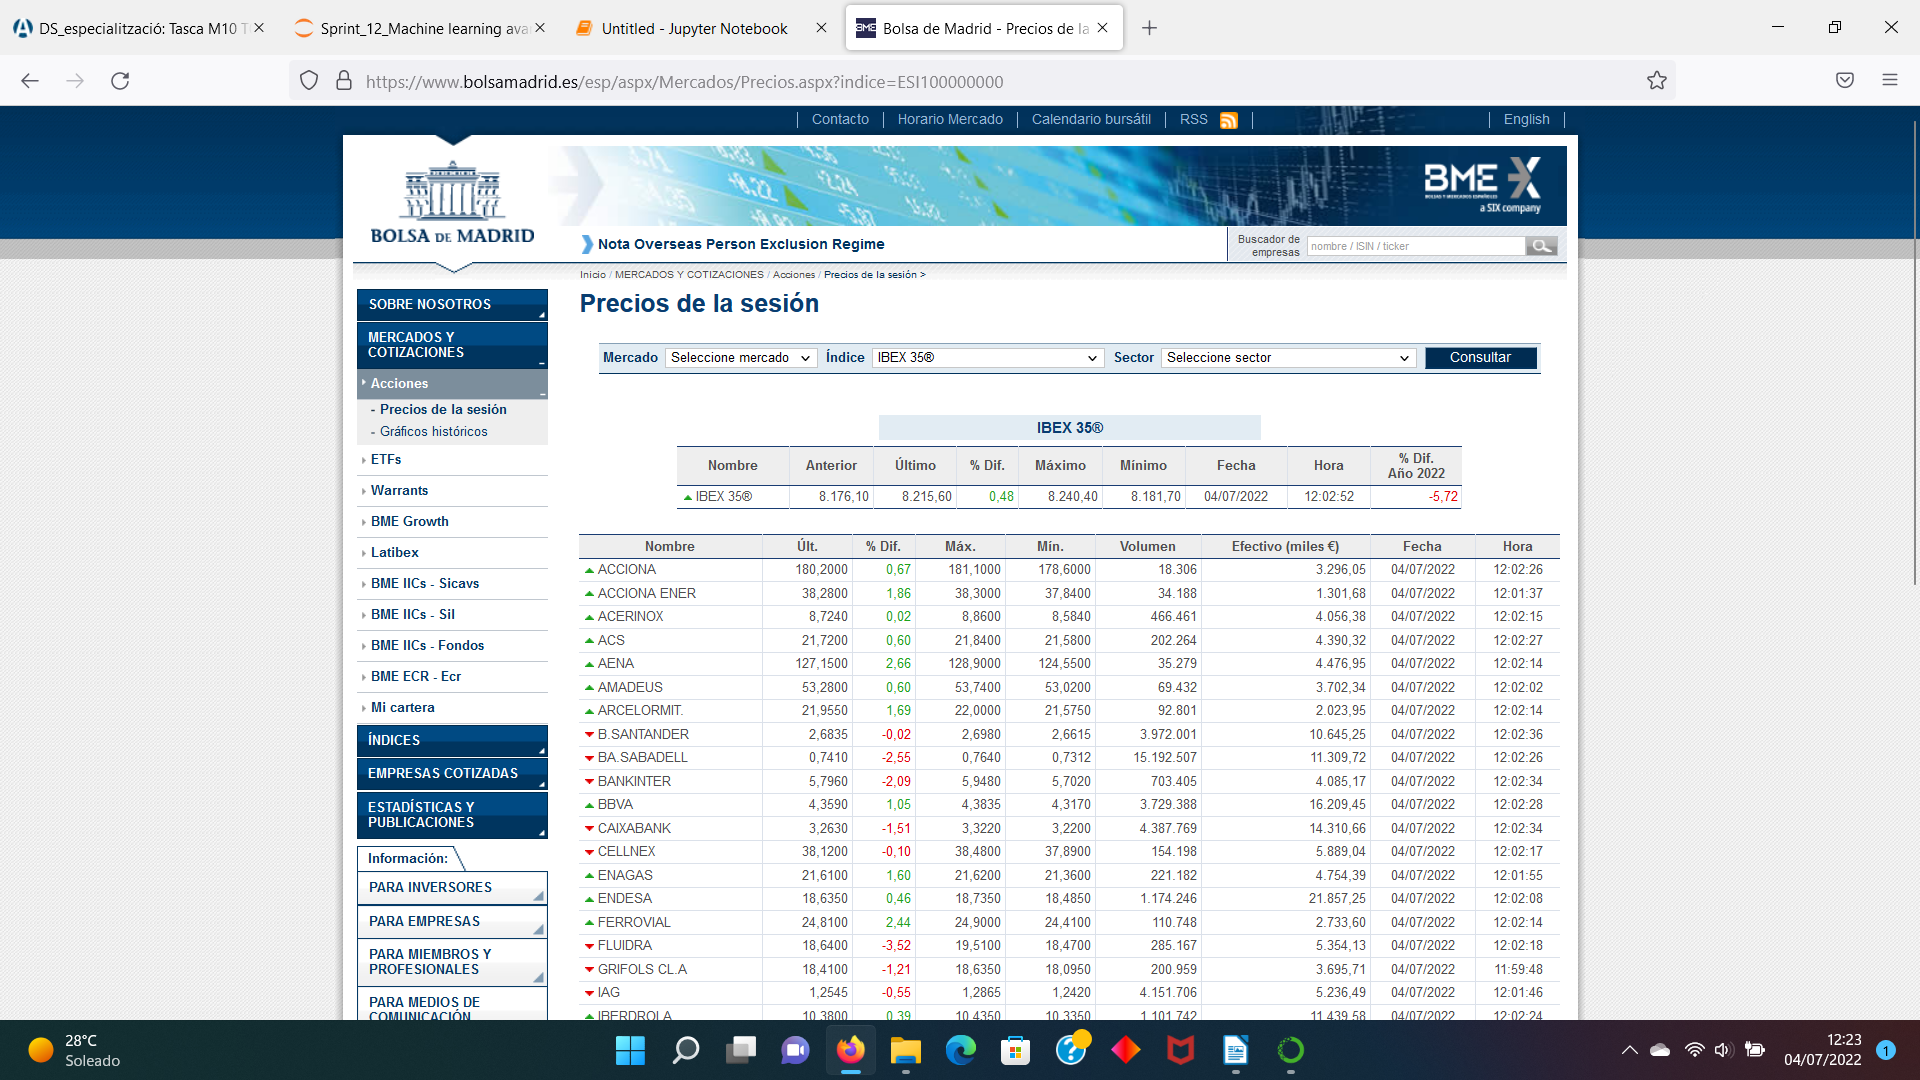

Creamos el objeto request a partir de la Url de la web

In [2]:
url = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
page = requests.get(url)

El servidor permite obtener información del website. Utilizamos BeautifulSoup para ver su contenido

In [3]:
soup = BeautifulSoup(page.content, "html.parser")

In [4]:
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Mon, 11 Jul 2022 20:53:19 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2022" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid - Precios de la sesión
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: R

Para obtener la tabla de precios de las acciones filtraríamos por

In [5]:
tabla_precios = soup.find('table', id= 'ctl00_Contenido_tblAcciones')

In [6]:
tabla_precios

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Últ.</th><th scope="col">% Dif.</th><th scope="col">Máx.</th><th scope="col">Mín.</th><th scope="col">Volumen</th><th scope="col">Efectivo (miles €)</th><th scope="col">Fecha</th><th class="Ult" scope="col">Hora</th>
</tr><tr align="right">
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">ACCIONA</a></td><td>192,1000</td><td class="DifClSb">1,21</td><td>193,2000</td><td>185,7000</td><td>121.846</td><td>23.330,61</td><td align="center">11/07/2022</td><td align="center" class="Ult">Cierre</td>
</tr><tr align="right">
<td align="left" class="DifFlSb"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105563003">ACCIONA ENER</a></td><td>39,7800</td><td class="DifClSb">0,45</td><td>40,4200</td><td>39,5800</td><td>180.229</td><td>7.198,82</td><td align="center">11/07/2022</td><td al

La tabla está en formato html. Se utilizan los siguientes marcadores:
- td   Indica los valores de cada registro
- tr   Indica nuevo registro
- th   Indica los nombres de los campos

In [7]:
#Obtenemos los nombres de los campos
columnas = []

for campo in tabla_precios.find_all('th'): 
    columna = campo.text
    columnas.append(columna)
    
print(columnas)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


Creamos un dataframe con la información de la tabla.    

In [8]:
#Creamos el dataframe con los nombres de los campos
cotizaciones = pd.DataFrame(columns=columnas)
cotizaciones

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora


In [9]:
#Añadimos los registros al dataframe
for i, fila in enumerate(tabla_precios.find_all('tr')[1:]):     #Selecciona las filas a partir de la primera
    datos_fila = fila.find_all('td')                            #Selecciona los datos de cada fila
    registro = [d.text for d in datos_fila]                     #Crea el registro con los datos de la fila
    cotizaciones.loc[i+1] = registro                            #Añade el registro al dataframe

cotizaciones

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
1,ACCIONA,"192,1000","1,21","193,2000","185,7000",121.846,"23.330,61",11/07/2022,Cierre
2,ACCIONA ENER,"39,7800","0,45","40,4200","39,5800",180.229,"7.198,82",11/07/2022,Cierre
3,ACERINOX,"8,4100","-2,55","8,5880","8,3000",932.462,"7.867,34",11/07/2022,Cierre
4,ACS,"21,4900","-0,92","21,6200","21,3800",711.321,"15.289,54",11/07/2022,Cierre
5,AENA,"119,5500","-2,01","121,7500","119,2000",91.112,"10.937,20",11/07/2022,Cierre
6,AMADEUS,"53,1200","-0,75","53,6600","52,1000",366.248,"19.440,27",11/07/2022,Cierre
7,ARCELORMIT.,"21,5850","-1,44","21,7600","20,7500",436.373,"9.282,23",11/07/2022,Cierre
8,B.SANTANDER,"2,5600","-2,03","2,5970","2,5445",21.586.311,"55.580,55",11/07/2022,Cierre
9,BA.SABADELL,"0,6610","-2,10","0,6670","0,6512",23.413.225,"15.458,47",11/07/2022,Cierre
10,BANKINTER,"5,1000","-1,43","5,1440","5,0100",2.176.740,"11.076,50",11/07/2022,Cierre


Vemos el formato de los números

In [10]:
cotizaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              35 non-null     object
 1   Últ.                35 non-null     object
 2   % Dif.              35 non-null     object
 3   Máx.                35 non-null     object
 4   Mín.                35 non-null     object
 5   Volumen             35 non-null     object
 6   Efectivo (miles €)  35 non-null     object
 7   Fecha               35 non-null     object
 8   Hora                35 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB


Observamos que todos los campos son string y que la notación es latina: utiliza las comas para separar decimales y los puntos para indicar los miles. Procedemos a cambiarlo por comas para separar miles.

In [11]:
cotizaciones.replace('\.', '', regex=True, inplace=True)
cotizaciones.replace(',', '.', regex=True, inplace=True)
cotizaciones.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
1,ACCIONA,192.1000,1.21,193.2000,185.7000,121846,23330.61,11/07/2022,Cierre
2,ACCIONA ENER,39.7800,0.45,40.4200,39.5800,180229,7198.82,11/07/2022,Cierre
3,ACERINOX,8.4100,-2.55,8.5880,8.3000,932462,7867.34,11/07/2022,Cierre
4,ACS,21.4900,-0.92,21.6200,21.3800,711321,15289.54,11/07/2022,Cierre
5,AENA,119.5500,-2.01,121.7500,119.2000,91112,10937.20,11/07/2022,Cierre


Finalmente transformamos las columnas numéricas en float

In [12]:
columnas_num=['Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen','Efectivo (miles €)']

In [13]:
cotizaciones[columnas_num] = cotizaciones[columnas_num].astype(float)

In [14]:
cotizaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              35 non-null     object 
 1   Últ.                35 non-null     float64
 2   % Dif.              35 non-null     float64
 3   Máx.                35 non-null     float64
 4   Mín.                35 non-null     float64
 5   Volumen             35 non-null     float64
 6   Efectivo (miles €)  35 non-null     float64
 7   Fecha               35 non-null     object 
 8   Hora                35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.7+ KB


### 2.- Web Scraping con BeautifulSoup
Realizamos web scraping de http://quotes.toscrape.com/ de las 10 primeras frases del Tag Humor. Adjuntamos la página

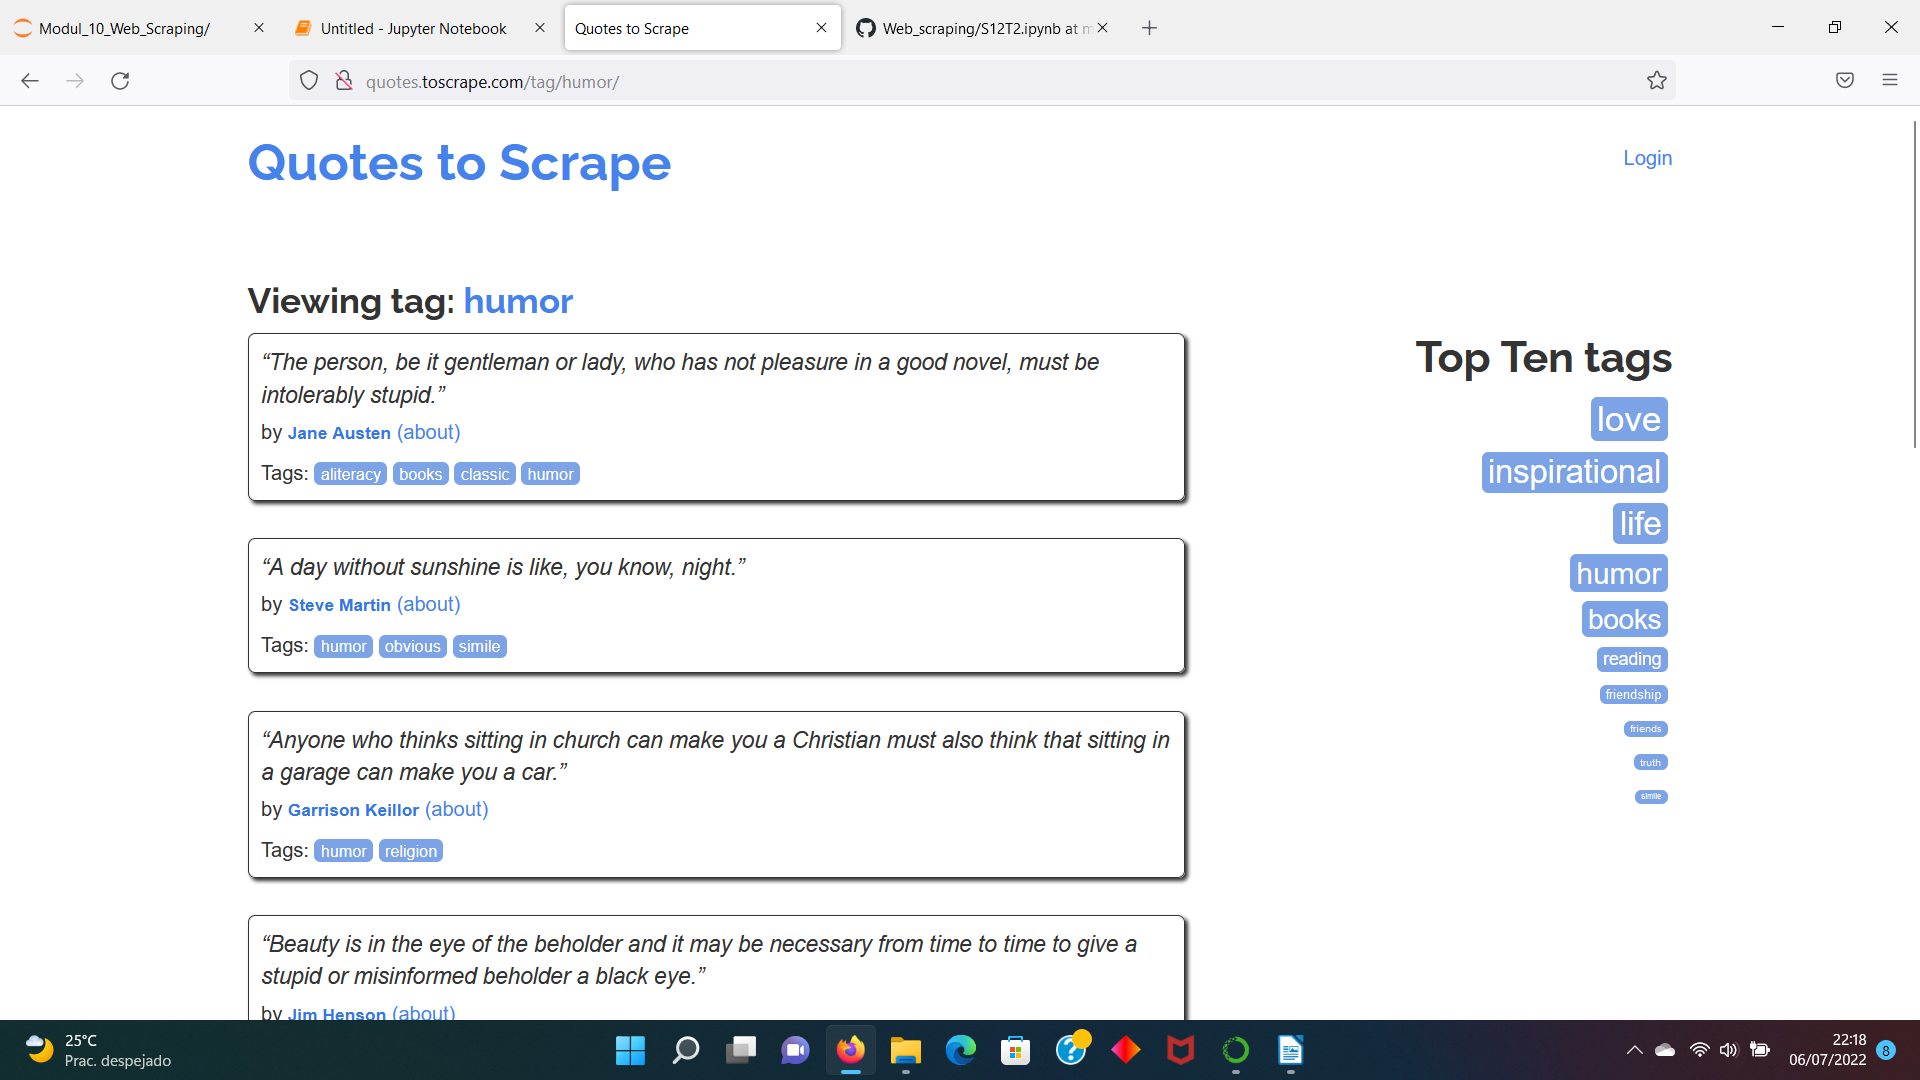

Creamos el objeto request a partir de la Url de la web

In [15]:
url = "http://quotes.toscrape.com/tag/humor/"
page = requests.get(url)

In [16]:
soup = BeautifulSoup(page.content, "html.parser")

In [17]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<h3>Viewing tag: <a href="/tag/humor/page/1/">humor</a></h3>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>
<span>by <small class="author" itemprop="author">Jane Austen</small>
<a href="/author/Jane-Austen">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="aliteracy,books,classic,hum

Obtenemos los bloques de las citas

In [18]:
quotes= soup.find_all('div', class_='quote')

In [19]:
texto=[]
autor=[]
for quote in quotes:
    texto.append(quote.find(class_='text').text)                   #Obtiene el texto de la cita
    autor.append(quote.find(class_= 'author').text)                #Obtiene el autor de la cita

Creamos un dataframe con las citas y su autor

In [20]:
citas=pd.DataFrame({'cita':texto, 'autor': autor})
citas

,cita,autor
0,"“The person, be it gentleman or lady, who has ...",Jane Austen
1,"“A day without sunshine is like, you know, nig...",Steve Martin
2,“Anyone who thinks sitting in church can make ...,Garrison Keillor
3,“Beauty is in the eye of the beholder and it m...,Jim Henson
4,“All you need is love. But a little chocolate ...,Charles M. Schulz
5,"“Remember, we're madly in love, so it's all ri...",Suzanne Collins
6,“Some people never go crazy. What truly horrib...,Charles Bukowski
7,"“The trouble with having an open mind, of cour...",Terry Pratchett
8,“Think left and think right and think low and ...,Dr. Seuss
9,“The reason I talk to myself is because I’m th...,George Carlin


### 3.- Web Scraping con Selenium
Utilizaremos Selenium para hacer Web Scraping de www.bolsamadrid.es de las cotizaciones de la sesión, que anteriormente realizamos con BeautifulSoup

In [22]:
url = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
browser = webdriver.Firefox(executable_path = 'C:/Users/joseb/Documents/Data Science/geckodriver')
browser.get(url)

C:\Users\joseb\AppData\Local\Temp/ipykernel_15900/2966751661.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = 'C:/Users/joseb/Documents/Data Science/geckodriver')


Sabemos que la tabla de precios está identificada como: id= 'ctl00_Contenido_tblAcciones'. Utilizaremos **xpath** para obtener los valores de la tabla de precios

In [24]:
#Creamos una tabla con los valores de ctl00_Contenido_tblAcciones
tabla = []
for fila in browser.find_elements(by= By.XPATH, value = '//*[contains(@id,"ctl00_Contenido_tblAcciones")]//tr'):
        datos_fila = fila.find_elements(by= By.XPATH, value= ".//*[self::td or self::th]")
        registro = [item.text for item in datos_fila]       
        tabla.append(registro)

Creamos el dataframe a partir de la tabla obtenida. La primera fila contiene los nombres de los campos

In [25]:
cotizaciones_acciones = pd.DataFrame(tabla[1:], columns = tabla[0])
cotizaciones_acciones.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"183,2000","1,66","184,0000","181,4000",14.199,"2.595,56",07/07/2022,09:36:05
1,ACCIONA ENER,"38,4600","0,52","38,6000","38,3200",8.337,"320,56",07/07/2022,09:35:32
2,ACERINOX,"8,3680","2,45","8,3900","8,2200",182.603,"1.519,58",07/07/2022,09:36:09
3,ACS,"21,0700","1,35","21,1000","20,6900",127.366,"2.660,07",07/07/2022,09:36:12
4,AENA,"120,7500","1,47","121,4500","120,0000",13.582,"1.641,78",07/07/2022,09:35:01


### - Exercici 2

Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

Per saber més

A manera d'exemple del que es demana pots consultar aquest enllaç:

->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.


In [12]:
cotizaciones

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
1,ACCIONA,"184,7000","2,50","185,2000","181,4000",33.923,"6.234,49",07/07/2022,11:00:20
2,ACCIONA ENER,"38,9400","1,78","38,9600","38,3200",26.701,"1.032,23",07/07/2022,11:01:30
3,ACERINOX,"8,4740","3,75","8,4740","8,2200",440.012,"3.684,81",07/07/2022,11:03:28
4,ACS,"21,1200","1,59","21,2000","20,6900",212.469,"4.456,58",07/07/2022,11:03:41
5,AENA,"120,8500","1,55","121,4500","120,0000",34.852,"4.215,14",07/07/2022,11:01:55
6,AMADEUS,"53,0200","1,77","53,6000","52,3400",71.251,"3.777,23",07/07/2022,11:03:40
7,ARCELORMIT.,"21,6800","4,84","21,6800","20,9150",212.372,"4.528,53",07/07/2022,11:03:23
8,B.SANTANDER,"2,6015","3,01","2,6235","2,5550",9.824.649,"25.523,52",07/07/2022,11:03:32
9,BA.SABADELL,"0,6718","3,48","0,6820","0,6586",15.921.475,"10.672,22",07/07/2022,11:03:30
10,BANKINTER,"5,2200","3,24","5,2580","5,0920",1.691.998,"8.771,88",07/07/2022,11:02:55


## About Dataset
### Context

Este dataset contiene información de las cotizaciones de las empresas del IBEX35 del día 7/7/2022 a las 11h.    
### Content

35 filas y 9 columnas.   
Las columnas están descritas a continuación:   
- Nombre: Nombre de la empresa
- Últ.: Último precio de la acción en euros
- % Dif: Diferencia porcentual entre el último precio de la acción y el precio a la apertura de la sesión bursátil
- Máx. : Máximo precio de la acción en la actual sesión bursátil
- Mín. : Mínimo precio de la acción en la actual sesión bursátil
- Volumen : Número de transacciones realizadas desde inicio de la sesión
- Efectivo (miles €) : Importe de las transacciones realizadas desde el inicio de la sesión, expresado en miles de euros
- Fecha : Fecha de la sesión
- Hora : Hora de la última actualización del registro

   
### Acknowledgements

Datos obtenidos mediante técnicas de Web Scraping de www.bolsamadrid.es

## - Exercici 3

Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 

Utilizaremos una web preparada para hacer scrapes: www.books.toscrape.com, que simula una librería on-line. Seleccionamos los libros de historia y descargaremos el título, precio y disponibilidad

## 1.- Selenium

En este ejemplo utilizaremos el CSS_SELECTOR para obtener la información

In [16]:
url = 'http://books.toscrape.com/catalogue/category/books/history_32/index.html'
browser = webdriver.Firefox(executable_path = 'C:/Users/joseb/Documents/Data Science/geckodriver')
browser.get(url)

C:\Users\joseb\AppData\Local\Temp/ipykernel_12592/523699295.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = 'C:/Users/joseb/Documents/Data Science/geckodriver')


In [17]:
#Creamos una lista de dictionarios con los valores de cada libro (product_pod)
data=[]
books=browser.find_elements(by= By.CSS_SELECTOR, value='.product_pod')
for book in books:
            title = book.find_element_by_css_selector("h3 > a")
            price = book.find_element_by_css_selector(".price_color")
            stock = book.find_element_by_css_selector(".instock.availability")
            data.append({
                'title': title.get_attribute("title"),
                'price': price.text,
                'stock': stock.text,
                
            })  

C:\Users\joseb\AppData\Roaming\Python\Python39\site-packages\selenium\webdriver\remote\webelement.py:484: UserWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  warnings.warn("find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead")


In [18]:
data

[{'title': 'Sapiens: A Brief History of Humankind',
  'price': '£54.23',
  'stock': 'In stock'},
 {'title': 'Unbound: How Eight Technologies Made Us Human, Transformed Society, and Brought Our World to the Brink',
  'price': '£25.52',
  'stock': 'In stock'},
 {'title': 'The Age of Genius: The Seventeenth Century and the Birth of the Modern Mind',
  'price': '£19.73',
  'stock': 'In stock'},
 {'title': 'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mistakes in the Annals of American Politics',
  'price': '£36.28',
  'stock': 'In stock'},
 {'title': 'Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History',
  'price': '£59.64',
  'stock': 'In stock'},
 {'title': 'Zealot: The Life and Times of Jesus of Nazareth',
  'price': '£24.70',
  'stock': 'In stock'},
 {'title': 'A Distant Mirror: The Calamitous 14th Century',
  'price': '£14.58',
  'stock': 'In stock'},
 {'title': '1491: New 

In [ ]:
Creamos el dataframe a partir de la lista de dictionarios

In [19]:
datos_df=pd.DataFrame(data)
datos_df

,title,price,stock
0,Sapiens: A Brief History of Humankind,£54.23,In stock
1,"Unbound: How Eight Technologies Made Us Human,...",£25.52,In stock
2,The Age of Genius: The Seventeenth Century and...,£19.73,In stock
3,"Political Suicide: Missteps, Peccadilloes, Bad...",£36.28,In stock
4,Thomas Jefferson and the Tripoli Pirates: The ...,£59.64,In stock
5,Zealot: The Life and Times of Jesus of Nazareth,£24.70,In stock
6,A Distant Mirror: The Calamitous 14th Century,£14.58,In stock
7,1491: New Revelations of the Americas Before C...,£21.80,In stock
8,Brilliant Beacons: A History of the American L...,£11.45,In stock
9,"""Most Blessed of the Patriarchs"": Thomas Jeffe...",£44.48,In stock


## 2.- Scrapy

En este ejemplo utilizaremos xpath para obtener la información

Creamos la clase para guardar los resultados en un archivo Json

In [20]:
class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('book_result.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

Construímos el spider para obtener la información

In [21]:
class BookSpider(scrapy.Spider):
    name = 'bookspider'
    start_urls = [
        'http://books.toscrape.com/catalogue/category/books/history_32/index.html'
    ]

    custom_settings = {
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1},        # Usado en la pipeline 1
        'FEED_FORMAT':'json',                                        # Usado en la pipeline 2
        'FEED_URI': 'book_result.json'                               # Usado en la pipeline 2
    }
    
    def parse(self, response):
        for link in response.xpath('//article[@class="product_pod"]/div/a/@href').extract():
            yield response.follow(link, callback=self.parse_detail)
        next_page = response.xpath('//li[@class="next"]/a/@href').extract_first()
        if next_page:
            yield response.follow(next_page, callback=self.parse)

    def parse_detail(self, response):
        title = response.xpath('//div[contains(@class, "product_main")]/h1/text()').extract_first()
        price = response.xpath('//div[contains(@class, "product_main")]/'
                               'p[@class="price_color"]/text()').extract_first()
        availability = response.xpath('//div[contains(@class, "product_main")]/'
                                      'p[contains(@class, "availability")]/text()').extract()
        availability = ''.join(availability).strip()
        
        yield {
            'title': title,
            'price': price,
            'availability': availability,            
        }

Ejecutamos el spider

In [22]:
process = CrawlerProcess()
process.crawl(BookSpider)
process.start()

2022-07-11 21:06:30 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-07-11 21:06:30 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.8, Platform Windows-10-10.0.22000-SP0
2022-07-11 21:06:30 [scrapy.crawler] INFO: Overridden settings:
{}
2022-07-11 21:06:30 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-07-11 21:06:30 [scrapy.extensions.telnet] INFO: Telnet Password: e9898d5a384c2687
2022-07-11 21:06:30 [py.warnings] WARNING: C:\ProgramData\Anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)

2022-07-

In [23]:
books_df=pd.read_json('book_result.json')
books_df

,title,price,availability
0,Sapiens: A Brief History of Humankind,£54.23,In stock (20 available)
1,A Short History of Nearly Everything,£52.40,In stock (7 available)
2,The Guns of August,£14.54,In stock (3 available)
3,America's War for the Greater Middle East: A M...,£51.22,In stock (5 available)
4,The Rise and Fall of the Third Reich: A Histor...,£39.67,In stock (6 available)
5,"House of Lost Worlds: Dinosaurs, Dynasties, an...",£43.70,In stock (3 available)
6,The Hiding Place,£55.91,In stock (5 available)
7,Catherine the Great: Portrait of a Woman,£58.55,In stock (6 available)
8,The Mathews Men: Seven Brothers and the War Ag...,£42.91,In stock (5 available)
9,"""Most Blessed of the Patriarchs"": Thomas Jeffe...",£44.48,In stock (8 available)
